In [82]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [83]:
df = pd.read_csv("telecom_churn.csv")

In [84]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [85]:
df.drop("customerID",axis=1,inplace=True)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [87]:
df.describe()

,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


In [88]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [89]:
#object to float datatype 
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [90]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [91]:
df=df.dropna()

In [92]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [93]:
df.shape

(7032, 20)

<Axes: xlabel='Churn', ylabel='count'>

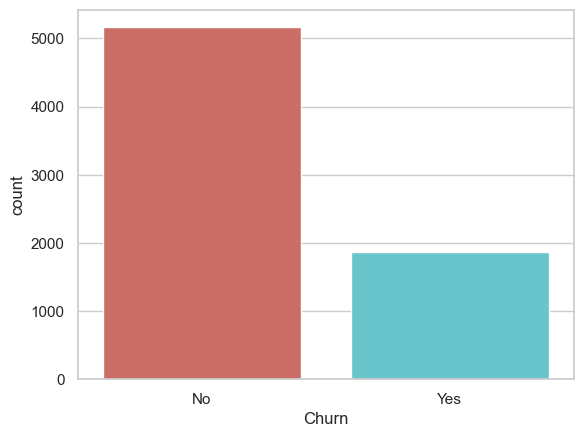

In [94]:
sns.countplot(data=df,x='Churn',palette='hls')


In [95]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Axes: xlabel='Churn'>

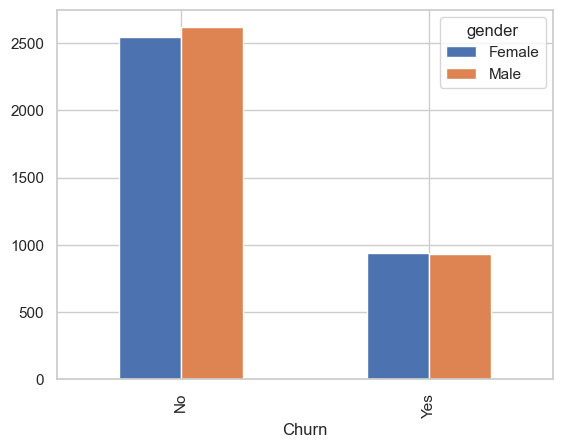

In [96]:
pd.crosstab(df.Churn,df.gender).plot(kind='bar')

In [97]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [98]:
services=['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies']

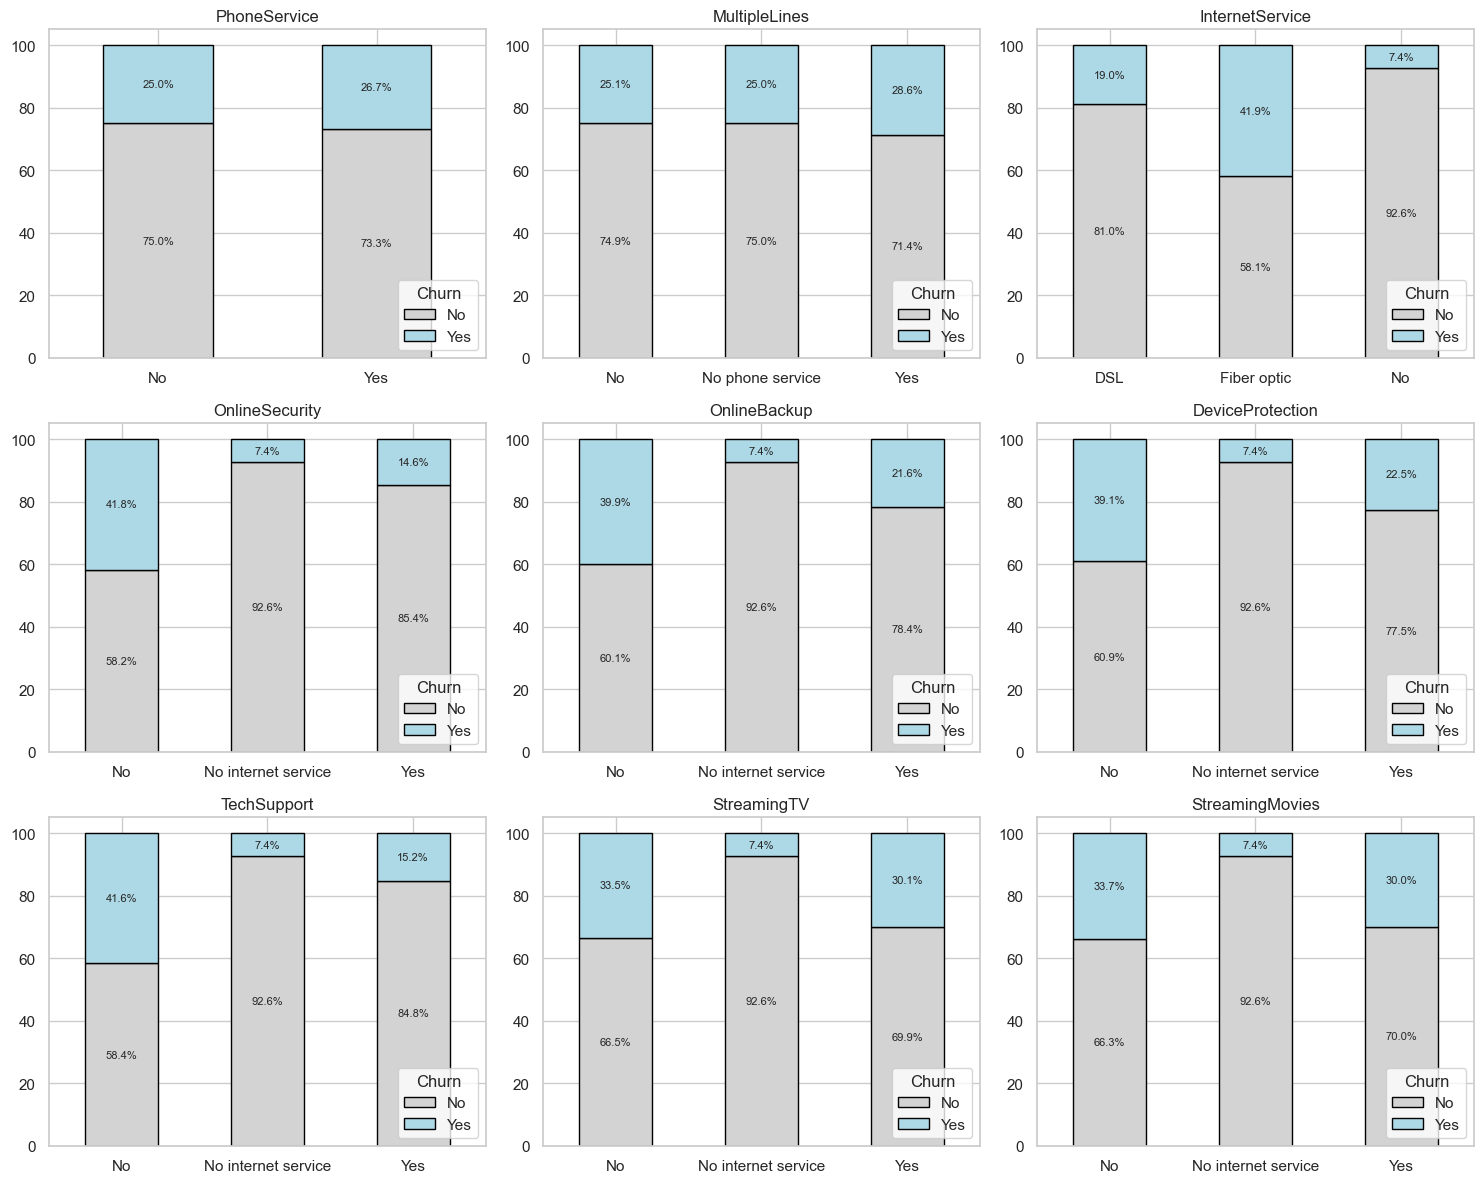

In [99]:
fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services[:3]):
    contract_churn_percent = df.groupby([item, 'Churn']).size() / df.groupby(item).size() * 100

    pivot_df=contract_churn_percent.unstack()
    ax = pivot_df.plot(kind='bar', stacked=True, color=['lightgrey', 'lightblue'], edgecolor='black', ax=axes[0,i], rot=0)
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=8)
        ax.set_title(item)
        ax.set_xlabel('')
        ax.legend(title='Churn',loc='lower right')

for i, item in enumerate(services[3:6]):
    contract_churn_percent = df.groupby([item, 'Churn']).size() / df.groupby(item).size() * 100
    pivot_df = contract_churn_percent.unstack()
    ax = pivot_df.plot(kind='bar', stacked=True, color=['lightgrey', 'lightblue'], edgecolor='black', ax=axes[1,i], rot=0)
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=8)
        ax.set_title(item)
        ax.set_xlabel('')
        ax.legend(title='Churn',loc='lower right')
        

for i, item in enumerate(services[6:]):
    contract_churn_percent = df.groupby([item,"Churn"]).size()/df.groupby(item).size()*100
    pivot_df=contract_churn_percent.unstack()
    ax=pivot_df.plot(kind="bar",stacked=True,color=['lightgrey', 'lightblue'], edgecolor='black',ax=axes[2,i],rot=0)
    
    for p in ax.patches:
        width,height = p.get_width(),p.get_height()
        x,y = p.get_xy()
        ax.annotate(f'{height:.1f}%',(x + width / 2, y + height / 2), ha='center', va='center', fontsize=8)
        ax.set_title(item)
        ax.set_xlabel('')
        ax.legend(title='Churn',loc='lower right')
plt.tight_layout()
plt.show()
  

#### we could see that streamingTV and Streaming Movies are almost giving the same info , so lets make it into single one as well as the same is the case with OnlineSecurity,OnlineBackup



In [100]:
df['Online_service'] =df['OnlineSecurity'] + df['OnlineBackup']
df['Online_service'] =df["Online_service"].replace({'NoNo': 'No Online Service',
                                                       'YesNo': 'Only Security',
                                                       'NoYes': 'Only Backup',
                                                       'YesYes': 'Both Services',
                                                       'No internet serviceNo internet service':'No internet service'})
df.drop(['OnlineSecurity', 'OnlineBackup'], axis=1, inplace=True)

C:\Users\Adhersh A\AppData\Local\Temp\ipykernel_33856\586167382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Online_service'] =df['OnlineSecurity'] + df['OnlineBackup']
C:\Users\Adhersh A\AppData\Local\Temp\ipykernel_33856\586167382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Online_service'] =df["Online_service"].replace({'NoNo': 'No Online Service',
C:\Users\Adhersh A\AppData\Local\Temp\ipykernel_33856\586167382.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [101]:
df['StreamingServices'] = df['StreamingTV'] +  df['StreamingMovies']
df['StreamingServices'] = df['StreamingServices'].replace({'NoNo': 'No Streaming Service', 
                                                         'YesNo': 'Only TV', 
                                                         'NoYes': 'Only Movies', 
                                                         'YesYes': 'Both Services',
                                                         'No internet serviceNo internet service':'No internet service'})
df.drop(['StreamingTV', 'StreamingMovies'], axis=1, inplace=True)

C:\Users\Adhersh A\AppData\Local\Temp\ipykernel_33856\3413186951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['StreamingServices'] = df['StreamingTV'] +  df['StreamingMovies']
C:\Users\Adhersh A\AppData\Local\Temp\ipykernel_33856\3413186951.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['StreamingServices'] = df['StreamingServices'].replace({'NoNo': 'No Streaming Service',
C:\Users\Adhersh A\AppData\Local\Temp\ipykernel_33856\3413186951.py:7: SettingWithCopyWarning: 
A value is trying to b

In [102]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Online_service,StreamingServices
0,Female,No,Yes,No,1,No,No phone service,DSL,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Only Backup,No Streaming Service
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,One year,No,Mailed check,56.95,1889.50,No,Only Security,No Streaming Service
2,Male,No,No,No,2,Yes,No,DSL,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Both Services,No Streaming Service
3,Male,No,No,No,45,No,No phone service,DSL,Yes,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,No,Only Security,No Streaming Service
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,No Online Service,No Streaming Service
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,Only Security,Both Services
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,No,One year,Yes,Credit card (automatic),103.20,7362.90,No,Only Backup,Both Services
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,Only Security,No Streaming Service
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,No Online Service,No Streaming Service


In [103]:
cust_info = ['gender','SeniorCitizen','Partner','Dependents']

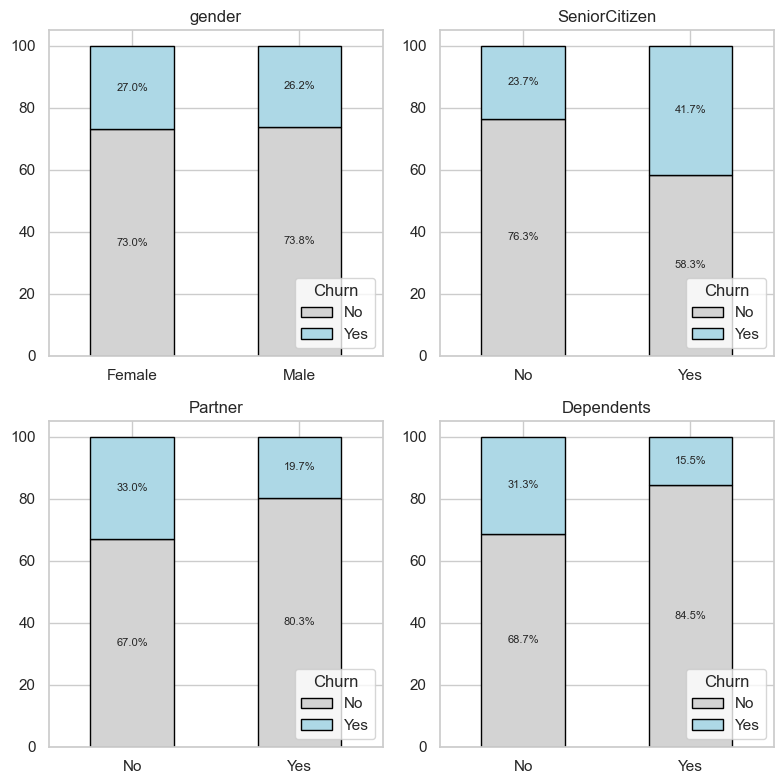

In [104]:
fig, axes = plt.subplots(nrows = 2,ncols = 2,figsize = (8,8))
for i, item in enumerate(cust_info[:2]):
    contract_churn_percent = df.groupby([item, 'Churn']).size() / df.groupby(item).size() * 100
    pivot_df = contract_churn_percent.unstack()
    ax = pivot_df.plot(kind='bar', stacked=True, color=['lightgrey', 'lightblue'], edgecolor='black', ax=axes[0,i], rot=0)
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=8)
        ax.set_title(item)
        ax.set_xlabel('')
        ax.legend(title='Churn',loc='lower right')
for i, item in enumerate(cust_info[2:4]):
    contract_churn_percent = df.groupby([item, 'Churn']).size() / df.groupby(item).size() * 100
    pivot_df = contract_churn_percent.unstack()
    ax = pivot_df.plot(kind='bar', stacked=True, color=['lightgrey', 'lightblue'], edgecolor='black', ax=axes[1,i], rot=0)
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=8)
        ax.set_title(item)
        ax.set_xlabel('')
        ax.legend(title='Churn',loc='lower right')
plt.tight_layout()
plt.show()
    


a senior citizen is more likely to churn<br>
customers without a partner are more likely to churn<br>
customers that don't have dependents are more likely to churn<br>
there aren't major differences between sexes<br>

In [105]:
payment = ['Contract', 'PaperlessBilling', 'PaymentMethod']

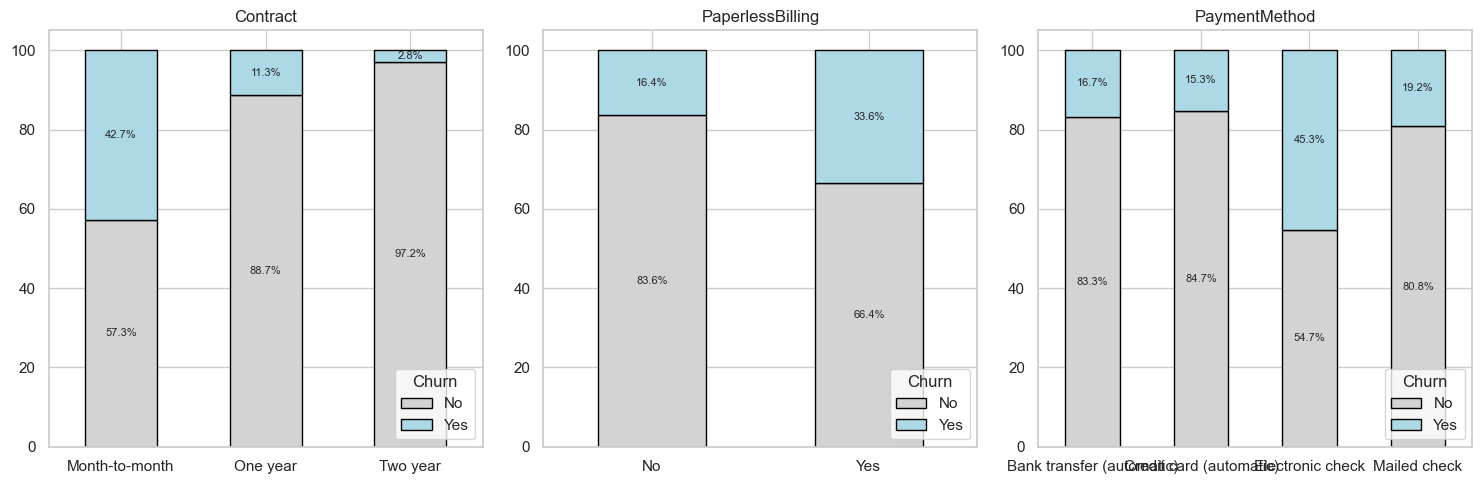

In [106]:
fig, axes = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i, item in enumerate(payment):
    contract_churn_percent = df.groupby([item, 'Churn']).size() / df.groupby(item).size() * 100
    pivot_df = contract_churn_percent.unstack()
    ax = pivot_df.plot(kind='bar', stacked=True, color=['lightgrey', 'lightblue'], edgecolor='black', ax=axes[i], rot=0)
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=8)
        ax.set_title(item)
        ax.set_xlabel('')
        ax.legend(title='Churn',loc='lower right')

plt.tight_layout()
plt.show()

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7032 non-null   object 
 1   SeniorCitizen      7032 non-null   object 
 2   Partner            7032 non-null   object 
 3   Dependents         7032 non-null   object 
 4   tenure             7032 non-null   int64  
 5   PhoneService       7032 non-null   object 
 6   MultipleLines      7032 non-null   object 
 7   InternetService    7032 non-null   object 
 8   DeviceProtection   7032 non-null   object 
 9   TechSupport        7032 non-null   object 
 10  Contract           7032 non-null   object 
 11  PaperlessBilling   7032 non-null   object 
 12  PaymentMethod      7032 non-null   object 
 13  MonthlyCharges     7032 non-null   float64
 14  TotalCharges       7032 non-null   float64
 15  Churn              7032 non-null   object 
 16  Online_service     7032 non-n

In [108]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Online_service,StreamingServices
0,Female,No,Yes,No,1,No,No phone service,DSL,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Only Backup,No Streaming Service
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,One year,No,Mailed check,56.95,1889.50,No,Only Security,No Streaming Service
2,Male,No,No,No,2,Yes,No,DSL,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Both Services,No Streaming Service
3,Male,No,No,No,45,No,No phone service,DSL,Yes,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,No,Only Security,No Streaming Service
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,No Online Service,No Streaming Service
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,Only Security,Both Services
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,No,One year,Yes,Credit card (automatic),103.20,7362.90,No,Only Backup,Both Services
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,Only Security,No Streaming Service
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,No Online Service,No Streaming Service


In [109]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'DeviceProtection',
       'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'Online_service',
       'StreamingServices'],
      dtype='object')

In [112]:
from sklearn.preprocessing import LabelEncoder
categorical_columns =['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'DeviceProtection',
       'TechSupport', 'Contract', 'PaperlessBilling','PaymentMethod', 'Churn', 'Online_service',
       'StreamingServices']

label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df[column + '_encoded'] = le.fit_transform(df[column])
    label_encoders[column] = le

# Drop the original categorical columns
df = df.drop(categorical_columns, axis=1)

# Display the resulting DataFrame with label-encoded columns
print(df)

      tenure  MonthlyCharges  TotalCharges  gender_encoded  \
0          1           29.85         29.85               0   
1         34           56.95       1889.50               1   
2          2           53.85        108.15               1   
3         45           42.30       1840.75               1   
4          2           70.70        151.65               0   
...      ...             ...           ...             ...   
7038      24           84.80       1990.50               1   
7039      72          103.20       7362.90               0   
7040      11           29.60        346.45               0   
7041       4           74.40        306.60               1   
7042      66          105.65       6844.50               1   

      SeniorCitizen_encoded  Partner_encoded  Dependents_encoded  \
0                         0                1                   0   
1                         0                0                   0   
2                         0                0       

C:\Users\Adhersh A\AppData\Local\Temp\ipykernel_33856\3865046384.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column + '_encoded'] = le.fit_transform(df[column])
C:\Users\Adhersh A\AppData\Local\Temp\ipykernel_33856\3865046384.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column + '_encoded'] = le.fit_transform(df[column])
C:\Users\Adhersh A\AppData\Local\Temp\ipykernel_33856\3865046384.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [113]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to your DataFrame (excluding non-numeric columns)
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Display the resulting normalized DataFrame
print(df)


        tenure  MonthlyCharges  TotalCharges  gender_encoded  \
0     0.000000        0.115423      0.001275             0.0   
1     0.464789        0.385075      0.215867             1.0   
2     0.014085        0.354229      0.010310             1.0   
3     0.619718        0.239303      0.210241             1.0   
4     0.014085        0.521891      0.015330             0.0   
...        ...             ...           ...             ...   
7038  0.323944        0.662189      0.227521             1.0   
7039  1.000000        0.845274      0.847461             0.0   
7040  0.140845        0.112935      0.037809             0.0   
7041  0.042254        0.558706      0.033210             1.0   
7042  0.915493        0.869652      0.787641             1.0   

      SeniorCitizen_encoded  Partner_encoded  Dependents_encoded  \
0                       0.0              1.0                 0.0   
1                       0.0              0.0                 0.0   
2                       0.0

In [116]:
df.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_encoded',
       'SeniorCitizen_encoded', 'Partner_encoded', 'Dependents_encoded',
       'PhoneService_encoded', 'MultipleLines_encoded',
       'InternetService_encoded', 'DeviceProtection_encoded',
       'TechSupport_encoded', 'Contract_encoded', 'PaperlessBilling_encoded',
       'PaymentMethod_encoded', 'Churn_encoded', 'Online_service_encoded',
       'StreamingServices_encoded'],
      dtype='object')

In [117]:
# Extract the target variable 'Churn_encoded' into y
y = df['Churn_encoded']

# Extract the remaining columns into X (excluding 'Churn_encoded')
X = df.drop('Churn_encoded', axis=1)


In [118]:
from sklearn.model_selection import train_test_split

# Assuming you have your features (X) and target variable (y) defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=40)


In [120]:
import statsmodels.api as sm

col_vif_dict = {}
for cols in X_train.columns:
    y = X_train.loc[:, X_train.columns == cols]
    x = X_train.loc[:, X_train.columns != cols]
    model = sm.OLS(y, x)
    results = model.fit()
    rsq = results.rsquared
    vif = round(1 / (1 - rsq), 2)
    col_vif_dict[cols] = vif

In [121]:
col_vif_dict

{'tenure': 16.96,
 'MonthlyCharges': 13.44,
 'TotalCharges': 17.4,
 'gender_encoded': 1.97,
 'SeniorCitizen_encoded': 1.36,
 'Partner_encoded': 2.84,
 'Dependents_encoded': 1.93,
 'PhoneService_encoded': 13.16,
 'MultipleLines_encoded': 2.71,
 'InternetService_encoded': 3.78,
 'DeviceProtection_encoded': 2.5,
 'TechSupport_encoded': 2.29,
 'Contract_encoded': 3.99,
 'PaperlessBilling_encoded': 2.8,
 'PaymentMethod_encoded': 3.05,
 'Online_service_encoded': 2.85,
 'StreamingServices_encoded': 2.48}

In [122]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((5625, 17), (5625,), (1407, 17), (1407,))

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [126]:
y_pred = logreg.predict(X_test)

In [127]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.81


In [128]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.802


In [129]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[932 101]
 [170 204]]


In [130]:
from sklearn.metrics import accuracy_score
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score(y_test,y_pred)))

Accuracy of logistic regression classifier on test set: 0.81


In [131]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87      1033
         1.0       0.67      0.55      0.60       374

    accuracy                           0.81      1407
   macro avg       0.76      0.72      0.74      1407
weighted avg       0.80      0.81      0.80      1407



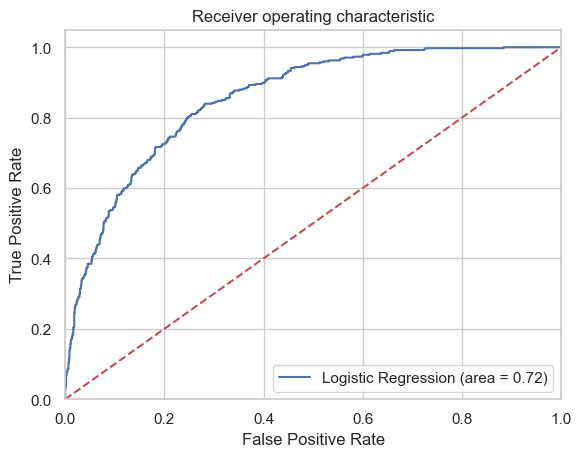

In [132]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()